# Resample data and concatenate channels


Here, we show how to resample different continuous data streams to be evenly sampled

In [47]:
from pathlib import Path
from pyneon import NeonRecording, get_sample_data
import matplotlib.pyplot as plt

# all paths are relative to the location of the notebook
dataset_path = get_sample_data('OfficeWalk')
recording_dir = dataset_path / 'Timeseries Data' /'walk1-e116e606'

test_output_dir = dataset_path
test_output_dir.mkdir(exist_ok=True)

recording = NeonRecording(recording_dir)
raw_gaze_data = recording.gaze.data
raw_eye_states_data = recording.eye_states.data
raw_imu_data = recording.imu.data


C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data


Concatenating channels:
	Gaze
	3D eye states
	IMU
Using customized sampling rate: 100 Hz ([])
Using latest start timestamp: 1725032224878547732 (['imu'])
Using earliest last timestamp: 1725032319533909732 (['imu'])
[10000000]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01]


Text(0.5, 1.0, 'Concatenated data')

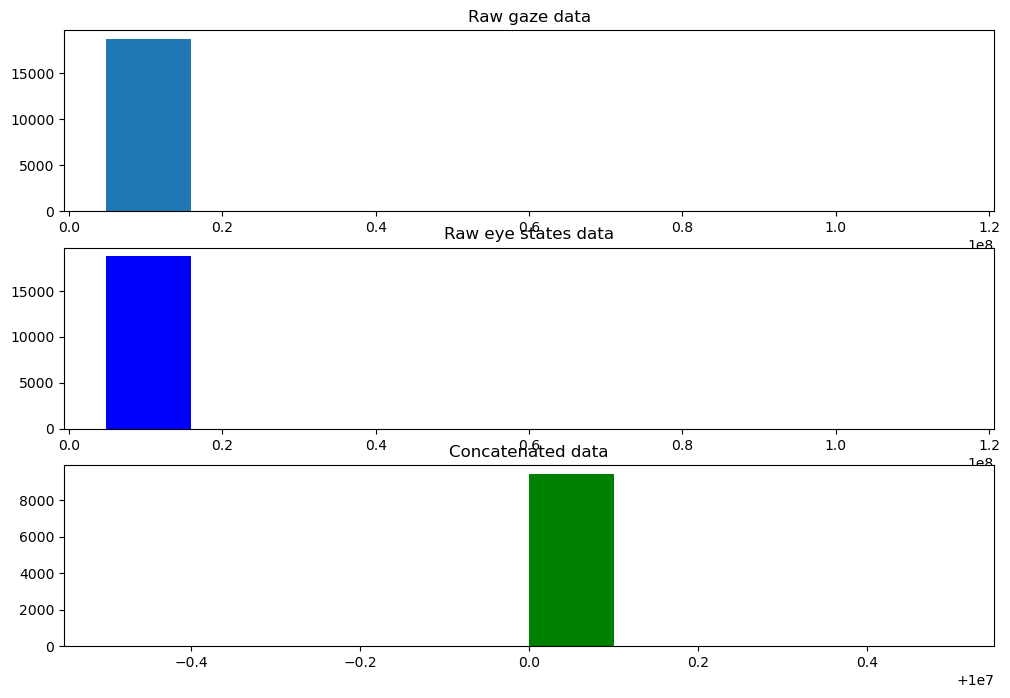

In [97]:
import numpy as np

concat_df = recording.concat_channels(["gaze", "eye_states", 'imu'], sampling_freq=100)
concat_df.to_csv(test_output_dir / "concat_gaze_eye_states.csv", index=False)

# create histograms before and after filtering

raw_gaze_diffs = raw_gaze_data['timestamp [ns]'].diff().dropna()
raw_eye_states_diffs = raw_eye_states_data['timestamp [ns]'].diff().dropna()

concat_df = concat_df.sort_values('timestamp [ns]')
concat_time_diffs = concat_df['timestamp [ns]'].diff().dropna()


print(np.unique(concat_time_diffs))
print(np.unique(concat_df['time [s]'].diff().dropna()))

fig, axs = plt.subplots(3, figsize=(12, 8))
axs[0].hist(raw_gaze_diffs, bins=10)
axs[0].set_title('Raw gaze data')
axs[1].hist(raw_eye_states_diffs, bins=10, alpha=1, color='blue') 
axs[1].set_title('Raw eye states data')
axs[2].hist(concat_time_diffs, bins=10, alpha=1, color='green')
axs[2].set_title('Concatenated data')



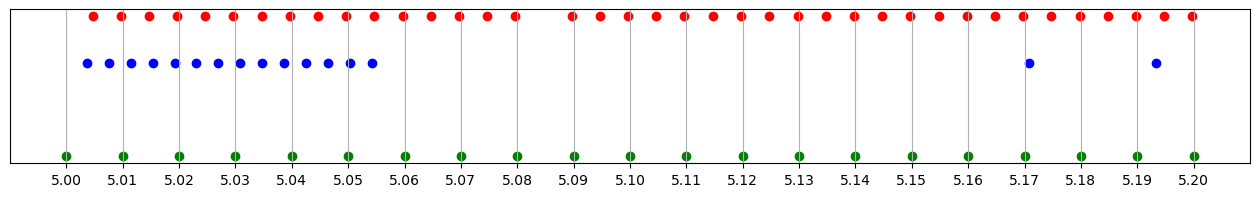

In [98]:
# i wanna zoom in on a short time frame of 0.1 seconds to show the value of upsampling

start_time = 5
end_time = 5.2

raw_gaze_interval = raw_gaze_data[(raw_gaze_data['time [s]'] >= start_time) & (raw_gaze_data['time [s]'] <= end_time)]
raw_eye_states_interval = raw_eye_states_data[(raw_eye_states_data['time [s]'] > start_time) & (raw_eye_states_data['time [s]'] <= end_time)]
raw_imu_interval = raw_imu_data[(raw_imu_data['time [s]'] >= start_time) & (raw_imu_data['time [s]'] <= end_time)]
concat_interval = concat_df[(concat_df['time [s]'] >= start_time) & (concat_df['time [s]'] <= end_time)]

# plot all data in the same scatter plot
plt.figure(figsize=(16, 2))
plt.scatter(raw_gaze_interval['time [s]'], np.zeros_like(raw_gaze_interval['time [s]'])+0.5, label='Raw gaze data', color='red')
plt.scatter(raw_imu_interval['time [s]'], np.zeros_like(raw_imu_interval['time [s]']), label='Raw eye states data', color='blue')
plt.scatter(concat_interval['time [s]'], np.zeros_like(concat_interval['time [s]'])-1, label='Concatenated data', color='green')
# set x-ticks with higher frequency and add gridlines
plt.xticks(np.arange(start_time, end_time, 0.01), labels=None)
# remove x labels
# remove y-ticks
plt.yticks([])
plt.grid()


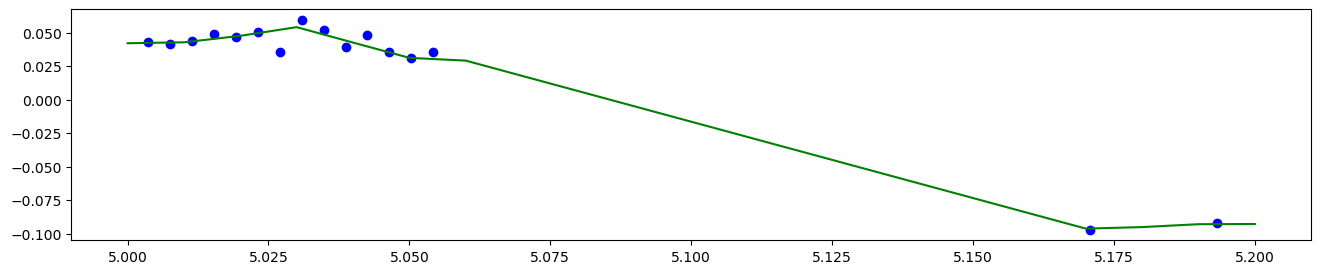

In [102]:
# plot imu data and interpolated data in same plot


plt.figure(figsize=(16, 3))
plt.scatter(raw_imu_interval['time [s]'], raw_imu_interval['acceleration x [g]'], label='Raw imu data', color='blue')
plt.plot(concat_interval['time [s]'], concat_interval['acceleration x [g]'], label='Interpolated imu data', color='green')
